<a href="https://colab.research.google.com/github/Varunravi21/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HDS 5210-2022 Programming for Health Data Scientists - Final Project

#Unraveling the Interplay between Global Unemployment and Inflation (1991-2021)

#INTRODUCTION
Unemployment and inflation, as fundamental metrics in assessing macroeconomic stability, have faced an increasingly uncertain correlation in recent times. The traditional Phillips curve posits a trade-off between inflation and unemployment, yet the 21st-century economy is characterized by structural changes challenging these assumptions. This analysis seeks to illuminate the contemporary dynamics between these two indicators, delving into global unemployment statistics spanning 1991-2021 and corresponding consumer price index inflation measures. Beyond evaluating shifts in this relationship across timeframes, the analysis will discern the impacts of influential factors such as economic growth, monetary policy, oil prices, and wage patterns on the historical movements of both series. In addition, the findings aim to guide policymakers in selecting appropriate levers and balancing targets for unemployment and inflation in the face of evolving real-world trends. Establishing a nuanced understanding of the interaction between rising prices and joblessness carries broader implications for the conduct of central banks and governments, providing insights crucial for stabilizing output and managing expectations in a dynamic economic landscape.




#Data Origin
The datasets I utilized were sourced from Kaggle, specifically:

*   Unemployment Dataset from https://www.kaggle.com/datasets/pantanjali/unemployment-dataset(CSV file)
*  Global Inflation Dataset (1970-2022) from https://www.kaggle.com/datasets/belayethossainds/global-inflation-dataset-212-country-19702022 ( I have converted my csv file to excel file)




#Importing the data
Loading the two dataset in the Dataframe

In [2]:
#Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data_1(Unemployment)
This dataset focuses on global unemployment spanning the years 1991 to 2021. It includes a variety of countries, each identified by 'Country Name' and 'Country Code.' The dataset's structure consists of columns for each year, starting from 1991 to 2021, providing a comprehensive overview of unemployment trends over this period.

With 235 rows and 33 columns, the dataset encompasses a substantial amount of information. Each row corresponds to a specific country, while the columns capture the unemployment rates for each year. This rich dataset allows for in-depth analysis and exploration of global unemployment patterns, making it a valuable resource for understanding the economic dynamics across different regions and time frames.

In [3]:
data_1 = pd.read_csv('unemployment analysis.csv')

In [4]:
data_1.shape

(235, 33)

In [5]:
data_1.columns

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [6]:
data_1.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


#Data_2(Global Inflation)
This dataset focuses on the global inflation rate spanning the extensive period from 1970 to 2022. It encompasses a diverse range of countries, identified by 'Country Code,' 'IMF Country Code,' and 'Country.' The dataset includes various indicators and series names to provide a detailed understanding of inflation metrics.

The structure of the dataset involves columns for each year, starting from 1970 to 2022, offering a comprehensive overview of inflation trends across different nations. With 783 rows and 64 columns, this dataset is a substantial repository of information. Each row represents a specific country, and the columns document the inflation rates for each corresponding year.

This dataset is a valuable resource for analyzing and exploring global inflation dynamics, facilitating insights into economic trends, policy impacts, and comparative assessments over the extensive time frame covered.

In [7]:
data_2 = pd.read_excel('Inflation data.xlsx')

In [8]:
data_2.shape

(783, 64)

In [9]:
data_2.head()

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,4.26,1.22,0.74,6.04,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,2.30,5.44,5.06,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,...,17.08,21.02,23.85,21.35,Annual average inflation,NaN,NaN,NaN,NaN,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.41,1.62,2.04,6.73,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,...,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN,NaN,NaN,NaN,NaN


In [10]:
data_2.columns

Index(['Country Code', 'IMF Country Code', 'Country', 'Indicator Type',
       'Series Name', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'Note', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63'],
      dtype='object')

#Renaming The column
To facilitate the merging of the two datasets, I am modifying the column names in the global inflation dataset. Specifically, I am changing only the columns with names ranging from '1991' to '2021'. This adjustment is crucial for ensuring a seamless comparison between the two datasets during the merging process.

In [11]:
data_2.columns = ['Inflation_' + col if col.isdigit() and 1991 <= int(col) <= 2021 else col for col in data_2.columns]

In [12]:
data_2.columns

Index(['Country Code', 'IMF Country Code', 'Country', 'Indicator Type',
       'Series Name', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', 'Inflation_1991',
       'Inflation_1992', 'Inflation_1993', 'Inflation_1994', 'Inflation_1995',
       'Inflation_1996', 'Inflation_1997', 'Inflation_1998', 'Inflation_1999',
       'Inflation_2000', 'Inflation_2001', 'Inflation_2002', 'Inflation_2003',
       'Inflation_2004', 'Inflation_2005', 'Inflation_2006', 'Inflation_2007',
       'Inflation_2008', 'Inflation_2009', 'Inflation_2010', 'Inflation_2011',
       'Inflation_2012', 'Inflation_2013', 'Inflation_2014', 'Inflation_2015',
       'Inflation_2016', 'Inflation_2017', 'Inflation_2018', 'Inflation_2019',
       'Inflation_2020', 'Inflation_2021', '2022', 'Note', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63'],
      dtype

#Merging the Unemployment and Global Inflation Dataset
Our main objective is to analyze and compare the trends in unemployment and inflation from 1991 to 2021, with the goal of establishing the correlation between rising prices and joblessness. To achieve this, we plan to merge the relevant country and year data from both datasets.

In [13]:
unemployment_data_selected = data_1[['Country Code','1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]
inflation_data_selected = data_2[['Country Code','Inflation_1991',
       'Inflation_1992', 'Inflation_1993', 'Inflation_1994', 'Inflation_1995',
       'Inflation_1996', 'Inflation_1997', 'Inflation_1998', 'Inflation_1999',
       'Inflation_2000', 'Inflation_2001', 'Inflation_2002', 'Inflation_2003',
       'Inflation_2004', 'Inflation_2005', 'Inflation_2006', 'Inflation_2007',
       'Inflation_2008', 'Inflation_2009', 'Inflation_2010', 'Inflation_2011',
       'Inflation_2012', 'Inflation_2013', 'Inflation_2014', 'Inflation_2015',
       'Inflation_2016', 'Inflation_2017', 'Inflation_2018', 'Inflation_2019',
       'Inflation_2020', 'Inflation_2021']]

In [14]:
# Merge the two datasets on the 'Country Code' column
merged_data = pd.merge(unemployment_data_selected, inflation_data_selected, on='Country Code', how='inner')

In [15]:
merged_data.shape

(738, 63)

In [16]:
merged_data.head()

,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,Inflation_2012,Inflation_2013,Inflation_2014,Inflation_2015,Inflation_2016,Inflation_2017,Inflation_2018,Inflation_2019,Inflation_2020,Inflation_2021
0,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,...,6.44,7.39,4.67,-0.66,4.38,4.98,0.63,2.30,5.44,5.06
1,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,...,11.81,8.80,-7.79,-4.25,2.07,4.44,1.47,-2.49,NaN,NaN
2,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,...,4.73,7.57,7.74,-0.84,5.67,6.94,-1.05,3.79,5.83,NaN
3,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,...,7.90,6.80,2.70,0.20,5.20,5.40,-0.10,NaN,NaN,NaN
4,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,4.05,...,10.28,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85


In [17]:
#Drop the duplicates
merged_data.drop_duplicates(subset='Country Code', inplace=True)

In [18]:
# After duplictaion of Merged_data
merged_data.shape

(181, 63)

In [19]:
merged_data.dtypes

Country Code       object
1991              float64
1992              float64
1993              float64
1994              float64
                   ...   
Inflation_2017    float64
Inflation_2018    float64
Inflation_2019    float64
Inflation_2020    float64
Inflation_2021    float64
Length: 63, dtype: object

In [20]:
merged_data.columns

Index(['Country Code', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', 'Inflation_1991',
       'Inflation_1992', 'Inflation_1993', 'Inflation_1994', 'Inflation_1995',
       'Inflation_1996', 'Inflation_1997', 'Inflation_1998', 'Inflation_1999',
       'Inflation_2000', 'Inflation_2001', 'Inflation_2002', 'Inflation_2003',
       'Inflation_2004', 'Inflation_2005', 'Inflation_2006', 'Inflation_2007',
       'Inflation_2008', 'Inflation_2009', 'Inflation_2010', 'Inflation_2011',
       'Inflation_2012', 'Inflation_2013', 'Inflation_2014', 'Inflation_2015',
       'Inflation_2016', 'Inflation_2017', 'Inflation_2018', 'Inflation_2019',
       'Inflation_2020', 'Inflation_2021'],
      dtype='object')

#Data Aggregation


*  I'am going to conduct data aggregation on the merged dataset to examine the
maximum and minimum rates across three decades, shedding light on both unemployment and inflation trends.
*  Initially, we will present key statistical measures, including minimum, maximum, mean, median, standard deviation, and count, for each individual year.


*   Subsequently, we will categorize the data by decades, providing a clearer understanding of fluctuations in both unemployment and inflation rates over time.

In [21]:
selected_years = ['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000']
average_unemployment = merged_data[selected_years].agg(['min', 'max', 'mean', 'median', 'std', 'count'])
print(average_unemployment)

              1991        1992        1993        1994        1995  \
min       0.300000    0.340000    0.410000    0.470000    0.500000   
max      36.120000   36.390000   36.740000   36.980000   37.340000   
mean      7.544696    7.931768    8.403094    8.563094    8.630276   
median    5.410000    5.710000    6.180000    6.600000    7.000000   
std       6.615886    6.923211    6.940393    6.843290    6.952015   
count   181.000000  181.000000  181.000000  181.000000  181.000000   

              1996        1997        1998        1999        2000  
min       0.560000    0.540000    0.560000    0.570000    0.580000  
max      38.800000   37.940000   37.160000   36.350000   35.460000  
mean      8.838343    8.709890    8.767735    8.866022    8.726519  
median    7.290000    7.140000    7.250000    7.020000    6.830000  
std       6.993126    6.822388    6.743605    6.678675    6.715890  
count   181.000000  181.000000  181.000000  181.000000  181.000000  


In [22]:
selected_years = ['2001', '2002', '2003', '2004', '2005', '2006','2007', '2008', '2009', '2010']
average_unemployment = merged_data[selected_years].agg(['min', 'max', 'mean', 'median', 'std', 'count'])
print(average_unemployment)

              2001        2002        2003        2004        2005  \
min       0.560000    0.550000    0.590000    0.610000    0.590000   
max      34.630000   33.860000   36.690000   37.160000   37.250000   
mean      8.734475    8.935691    8.901160    8.713039    8.477901   
median    6.740000    6.900000    6.950000    6.820000    7.170000   
std       6.762293    6.904702    6.781557    6.630082    6.524339   
count   181.000000  181.000000  181.000000  181.000000  181.000000   

              2006        2007        2008        2009        2010  
min       0.580000    0.400000    0.310000    0.310000    0.450000  
max      36.030000   34.930000   33.760000   32.180000   32.020000  
mean      8.051381    7.644972    7.502376    8.279171    8.480773  
median    6.500000    6.000000    5.860000    6.590000    7.110000  
std       6.295961    6.080901    5.862862    5.967199    6.239005  
count   181.000000  181.000000  181.000000  181.000000  181.000000  


In [23]:
selected_years = ['2011', '2012', '2013', '2014', '2015','2016', '2017', '2018', '2019', '2020', '2021']
average_unemployment = merged_data[selected_years].agg(['min', 'max', 'mean', 'median', 'std', 'count'])
print(average_unemployment)

              2011        2012        2013        2014        2015  \
min       0.320000    0.480000    0.250000    0.200000    0.170000   
max      31.380000   31.020000   29.000000   28.030000   27.690000   
mean      8.381050    8.401713    8.431547    8.279613    8.155359   
median    6.900000    6.790000    6.600000    6.550000    6.280000   
std       6.257485    6.377913    6.431229    6.289152    6.158780   
count   181.000000  181.000000  181.000000  181.000000  181.000000   

              2016        2017        2018        2019        2020        2021  
min       0.150000    0.140000    0.110000    0.100000    0.210000    0.260000  
max      26.540000   27.040000   26.910000   28.470000   29.220000   33.560000  
mean      8.022210    7.750663    7.504641    7.328564    8.532983    8.505028  
median    6.010000    5.760000    5.590000    5.340000    6.740000    6.570000  
std       6.034873    5.887997    5.808650    5.694055    6.064387    6.095289  
count   181.000000  181

In [24]:
selected_years = ['Inflation_1991','Inflation_1992', 'Inflation_1993', 'Inflation_1994', 'Inflation_1995','Inflation_1996', 'Inflation_1997', 'Inflation_1998', 'Inflation_1999','Inflation_2000']
average_Inflation = merged_data[selected_years].agg(['min', 'max', 'mean', 'median', 'std', 'count'])
print(average_Inflation)

        Inflation_1991  Inflation_1992  Inflation_1993  Inflation_1994  \
min         -13.140000      -71.330000      -10.870000       -2.760000   
max        2154.440000     4129.170000     4660.580000    23773.100000   
mean         49.005679      137.313155      204.909884      360.774971   
median       10.420000        9.710000        9.635000       10.670000   
std         179.239608      469.507708      663.951180     2206.520168   
count       162.000000      168.000000      172.000000      173.000000   

        Inflation_1995  Inflation_1996  Inflation_1997  Inflation_1998  \
min          -2.930000      -16.100000      -10.000000      -28.020000   
max        2672.230000     4146.010000     1037.480000      107.430000   
mean         58.405920       48.784425       19.235600        9.888068   
median        9.915000        7.120000        5.580000        5.400000   
std         233.902909      326.211511       82.492756       16.323702   
count       174.000000      174.00000

In [25]:
selected_years = [ 'Inflation_2001', 'Inflation_2002', 'Inflation_2003','Inflation_2004', 'Inflation_2005', 'Inflation_2006', 'Inflation_2007',
'Inflation_2008', 'Inflation_2009', 'Inflation_2010']
average_Inflation = merged_data[selected_years].agg(['min', 'max', 'mean', 'median', 'std', 'count'])
print(average_Inflation)

        Inflation_2001  Inflation_2002  Inflation_2003  Inflation_2004  \
min         -43.400000      -34.440000       -8.560000       -4.800000   
max         357.280000      108.890000       98.220000      113.570000   
mean          9.334438        6.631517        6.537207        6.362291   
median        4.115000        2.990000        3.510000        3.760000   
std          30.772195       12.189601       10.055930       10.628955   
count       178.000000      178.000000      179.000000      179.000000   

        Inflation_2005  Inflation_2006  Inflation_2007  Inflation_2008  \
min         -31.520000       -1.410000      -72.730000        1.380000   
max          36.960000       53.250000       30.930000      156.960000   
mean          5.988380        6.339106        5.779497       10.985196   
median        4.370000        4.650000        5.050000        8.900000   
std           6.175532        6.143889        7.821982       12.783200   
count       179.000000      179.00000

In [26]:
selected_years = [ 'Inflation_2011','Inflation_2012', 'Inflation_2013', 'Inflation_2014', 'Inflation_2015','Inflation_2016', 'Inflation_2017', 'Inflation_2018', 'Inflation_2019',
       'Inflation_2020', 'Inflation_2021']
average_Inflation = merged_data[selected_years].agg(['min', 'max', 'mean', 'median', 'std', 'count'])
print(average_Inflation)

        Inflation_2011  Inflation_2012  Inflation_2013  Inflation_2014  \
min          -0.370000       -0.910000       -0.920000       -1.410000   
max          53.170000       59.500000       90.000000       62.140000   
mean          6.580391        5.977222        5.031667        4.360944   
median        4.980000        3.995000        2.860000        2.800000   
std           6.053813        7.386757        8.545542        7.031431   
count       179.000000      180.000000      180.000000      180.000000   

        Inflation_2015  Inflation_2016  Inflation_2017  Inflation_2018  \
min          -3.750000       -3.090000      -13.310000      -14.400000   
max         121.400000      379.850000      438.120000    65374.080000   
mean          4.697000        7.706444        8.108380      369.993017   
median        1.880000        1.890000        2.450000        2.510000   
std          11.395077       34.318572       35.697752     4885.937857   
count       180.000000      180.00000

#Leveraging a custom aggregation function, we intend to delve into the trends of unemployment rates over the past three decades.

I aim to analyze the countries with the highest and lowest unemployment rates over three decades to compare trends across different periods. This exploration will help uncover patterns and variations in unemployment trends across various countries. By identifying these extremes, you can analyze trends and variations in employment levels over an extended period.

In [27]:
# Selecting the column I want and dealing with missing values
selected_columns = ['Country Code'] + [str(year) for year in range(1991, 2000)]
subset_data = merged_data[selected_columns].copy()
subset_data.replace({np.nan: -9999}, inplace=True)

# custom aggregation function for finding the average unemployment rate
def average_unemployment(series):
    series_numeric = pd.to_numeric(series, errors='coerce')
    return series_numeric.mean()
average_unemployment_by_country = subset_data.set_index('Country Code').apply(average_unemployment, axis=1)
# Calculating the highest unemployment rate in the time period(1991-2000)
country_with_highest_unemployment = average_unemployment_by_country.idxmax()
highest_unemployment_rate = average_unemployment_by_country.max()
# Calculating the Lowest unemployment rate in the time period(1991-2000)
country_with_lowest_unemployment = average_unemployment_by_country.idxmin()
lowest_unemployment_rate = average_unemployment_by_country.min()

print("Country with the Highest Average Unemployment Rate (1991 to 2000):")
print(f"{country_with_highest_unemployment} - {highest_unemployment_rate:.2f}%")

print("\nCountry with the Lowest Average Unemployment Rate (1991 to 2000):")
print(f"{country_with_lowest_unemployment} - {lowest_unemployment_rate:.2f}%")

Country with the Highest Average Unemployment Rate (1991 to 2000):
LSO - 36.96%

Country with the Lowest Average Unemployment Rate (1991 to 2000):
RWA - 0.51%


In [28]:
# Selecting the column I want and dealing with missing values
selected_columns = ['Country Code'] + [str(year) for year in range(2001, 2010)]
subset_data = merged_data[selected_columns].copy()
subset_data.replace({np.nan: -9999}, inplace=True)

# custom aggregation function for finding the average unemployment rate
def average_unemployment(series):
    series_numeric = pd.to_numeric(series, errors='coerce')
    return series_numeric.mean()
average_unemployment_by_country = subset_data.set_index('Country Code').apply(average_unemployment, axis=1)
# Calculating the highest unemployment rate in the time period(2001-2010)
country_with_highest_unemployment = average_unemployment_by_country.idxmax()
highest_unemployment_rate = average_unemployment_by_country.max()
# Calculating the Lowest unemployment rate in the time period(2001-2010)
country_with_lowest_unemployment = average_unemployment_by_country.idxmin()
lowest_unemployment_rate = average_unemployment_by_country.min()

print("Country with the Highest Average Unemployment Rate (2001 to 2010):")
print(f"{country_with_highest_unemployment} - {highest_unemployment_rate:.2f}%")

print("\nCountry with the Lowest Average Unemployment Rate (2001 to 2010):")
print(f"{country_with_lowest_unemployment} - {lowest_unemployment_rate:.2f}%")

Country with the Highest Average Unemployment Rate (2001 to 2010):
MKD - 34.50%

Country with the Lowest Average Unemployment Rate (2001 to 2010):
PAK - 0.54%


In [29]:
# Selecting the column I want and dealing with missing values
selected_columns = ['Country Code'] + [str(year) for year in range(2011, 2021)]
subset_data = merged_data[selected_columns].copy()
subset_data.replace({np.nan: -9999}, inplace=True)

# custom aggregation function for finding the average unemployment rate
def average_unemployment(series):
    series_numeric = pd.to_numeric(series, errors='coerce')
    return series_numeric.mean()
average_unemployment_by_country = subset_data.set_index('Country Code').apply(average_unemployment, axis=1)
# Calculating the highest unemployment rate in the time period(2011-2021)
country_with_highest_unemployment = average_unemployment_by_country.idxmax()
highest_unemployment_rate = average_unemployment_by_country.max()
# Calculating the Lowest unemployment rate in the time period(2011-2021)
country_with_lowest_unemployment = average_unemployment_by_country.idxmin()
lowest_unemployment_rate = average_unemployment_by_country.min()

print("Country with the Highest Average Unemployment Rate (2011 to 2021):")
print(f"{country_with_highest_unemployment} - {highest_unemployment_rate:.2f}%")

print("\nCountry with the Lowest Average Unemployment Rate (2011 to 2021):")
print(f"{country_with_lowest_unemployment} - {lowest_unemployment_rate:.2f}%")

Country with the Highest Average Unemployment Rate (2011 to 2021):
DJI - 26.63%

Country with the Lowest Average Unemployment Rate (2011 to 2021):
QAT - 0.24%


The analysis of average unemployment rates across three decades reveals significant variations among countries. In the period from 1991 to 2000, Lesotho (LSO) exhibited the highest average unemployment rate at 36.96%, contrasting with Rwanda (RWA), which had the lowest at 0.51%. Moving to the subsequent decade (2001 to 2010), North Macedonia (MKD) faced the highest average unemployment rate of 34.50%, while Pakistan (PAK) maintained the lowest at 0.54%. Finally, in the most recent decade (2011 to 2021), Djibouti (DJI) recorded the highest average unemployment rate of 26.63%, and Qatar (QAT) stood out with the lowest rate at a mere 0.24%. This comprehensive overview highlights the dynamic nature of unemployment trends across different countries and time periods, offering valuable insights into the economic landscape and potential areas for further investigation.

This comprehensive overview provides valuable insights into the economic landscape, showcasing the diverse challenges and opportunities different countries face in managing unemployment. The importance of understanding and addressing unemployment lies in its profound impact on decision-making, both at the policy level and in business operations. High unemployment rates can signify economic distress, social instability, and reduced consumer spending, affecting businesses' markets and profitability. In policymaking, recognizing and responding to unemployment trends is crucial for formulating effective strategies, including targeted interventions, training programs, and economic stimulus measures. For businesses, being attuned to unemployment rates is essential for workforce planning, risk assessment, and strategic decision-making in volatile economic environments. Therefore, a nuanced understanding of unemployment trends is indispensable for informed decision-making, fostering economic resilience, and promoting sustainable growth.

#Data Visualization on Unemployment an Inflation rate on Top countries to Understand the trend
 This analysis will concentrate on pivotal economic indicators spanning from 1991 to 2001, encompassing both unemployment and inflation rates, within a select group of nations. Specifically, the chosen countries for scrutiny include the United States (USA), India (IND), China (CHN), Russia (RUS), and Japan (JPN). This focused examination aims to offer a succinct overview of the economic trajectories of these nations throughout the specified timeframe. Such a comparative analysis of unemployment and inflation trends among these key players holds significant value for business stakeholders and policymakers. The insights derived from this study can serve as valuable inputs, aiding in informed decision-making and providing a comprehensive understanding of the economic landscape during this critical period.








In [30]:
selected_countries = [ 'USA','IND','CHN','RUS','JPN']
top_countries_table = merged_data[merged_data['Country Code'].isin(selected_countries)][['Country Code',   '1991', '1992', '1993', '1994', '1995', '1996', '1997',
 '1998', '1999', '2000', '2001','Inflation_1991','Inflation_1992', 'Inflation_1993', 'Inflation_1994', 'Inflation_1995', 'Inflation_1996', 'Inflation_1997', 'Inflation_1998',
 'Inflation_1999', 'Inflation_2000', 'Inflation_2001']]


In [31]:
top_countries_table.head()

,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,Inflation_1992,Inflation_1993,Inflation_1994,Inflation_1995,Inflation_1996,Inflation_1997,Inflation_1998,Inflation_1999,Inflation_2000,Inflation_2001
120,CHN,2.37,2.37,2.69,2.90,3.00,3.12,3.23,3.24,3.25,...,6.37,14.63,24.26,16.79,8.31,2.79,-0.77,-1.40,0.35,0.72
293,IND,5.60,5.73,5.69,5.74,5.76,5.74,5.61,5.67,5.74,...,11.79,6.33,10.25,10.22,8.98,7.16,13.23,4.67,4.01,3.78
336,JPN,2.10,2.20,2.50,2.90,3.20,3.40,3.40,4.10,4.70,...,1.76,1.24,0.70,-0.13,0.14,1.75,0.66,-0.34,-0.68,-0.74
565,RUS,5.41,5.18,5.88,8.13,9.45,9.67,11.81,13.26,13.04,...,1592.48,874.25,307.72,197.41,47.75,14.76,27.69,85.75,20.80,21.48
697,USA,6.80,7.50,6.90,6.12,5.65,5.45,5.00,4.51,4.22,...,3.03,2.95,2.61,2.81,2.93,2.34,1.55,2.19,3.38,2.83


In [32]:
top_countries_table.columns

Index(['Country Code', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', 'Inflation_1991', 'Inflation_1992',
       'Inflation_1993', 'Inflation_1994', 'Inflation_1995', 'Inflation_1996',
       'Inflation_1997', 'Inflation_1998', 'Inflation_1999', 'Inflation_2000',
       'Inflation_2001'],
      dtype='object')

In [33]:
unemployment_columns = ['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001']
inflation_columns = ['Inflation_1991', 'Inflation_1992', 'Inflation_1993', 'Inflation_1994', 'Inflation_1995',
                     'Inflation_1996', 'Inflation_1997', 'Inflation_1998', 'Inflation_1999', 'Inflation_2000', 'Inflation_2001']

# Reshape the DataFrame for easier plotting
unemployment_df = top_countries_table.melt(id_vars='Country Code', value_vars=unemployment_columns, var_name='Year', value_name='Unemployment Rate')
inflation_df = top_countries_table.melt(id_vars='Country Code', value_vars=inflation_columns, var_name='Year', value_name='Inflation Rate')

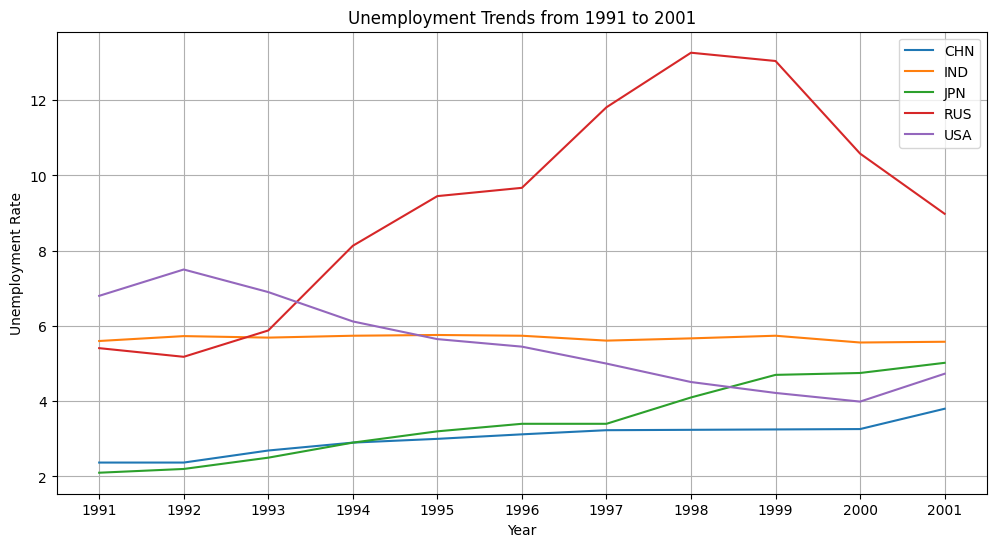

In [34]:
# Plotting trends for unemployment
plt.figure(figsize=(12, 6))
for country in top_countries_table['Country Code']:
    country_data = unemployment_df[unemployment_df['Country Code'] == country]
    plt.plot(country_data['Year'], country_data['Unemployment Rate'], label=country)

plt.title('Unemployment Trends from 1991 to 2001')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)

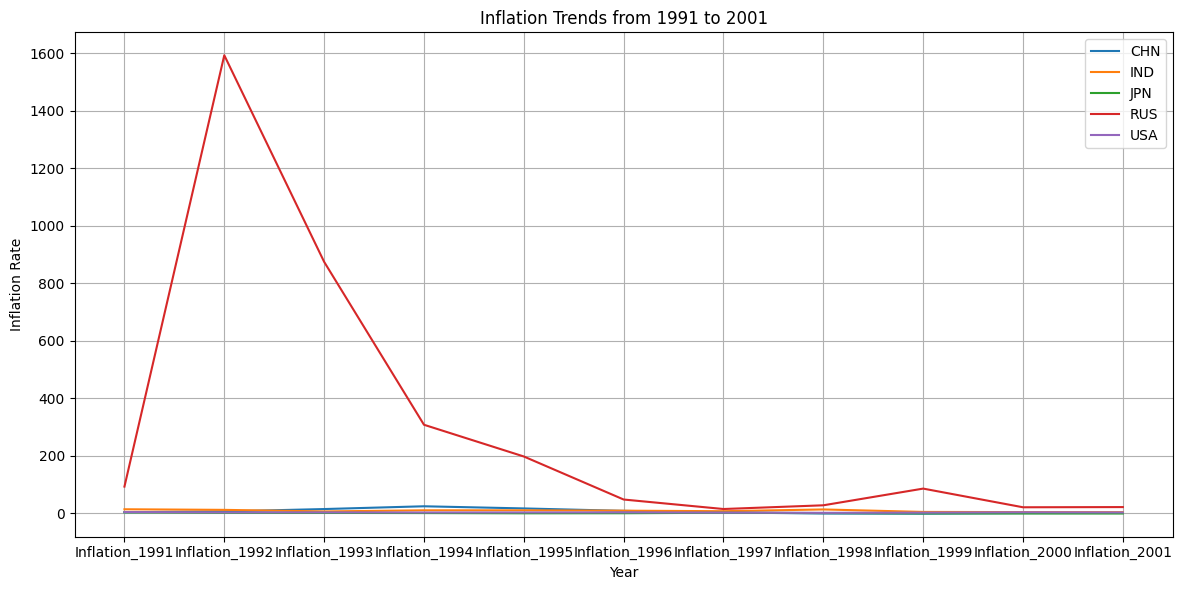

In [35]:
# Plotting trends for inflation
plt.figure(figsize=(12, 6))
for country in top_countries_table['Country Code']:
    country_data = inflation_df[inflation_df['Country Code'] == country]
    plt.plot(country_data['Year'], country_data['Inflation Rate'], label=country)

plt.title('Inflation Trends from 1991 to 2001')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the visualization of Unemployment and Inflation rate trens from 1991 t0 2001 for the sepicific selected coutries show the different trends in each country.

*   **China:**
In China, the unemployment rate remained consistently low in the early '90s, with a gradual increase over time. The inflation rate remained consistently low in the early '90s.
*   **India:**
India experienced a moderately high unemployment rate in the '90s, remaining relatively stable until the 2000s.India experienced a lower and steady inflation rate throughout the '90s.


*   **Japan:**
Japan initially faced a low unemployment rate, but it increased notably in 1997 and the early 2000s.The Inflation rate in Japan initially faced a low and stable inflation rate, following a flat trend.
* **Russia:**
Russia had a higher unemployment rate in the '90s, reaching its peak in 1998, followed by a slight decline in the early 2000s.Russia had a higher inflation rate in the '90s, reaching its peak in 1991, followed by a substantial decline in 1995 and a further decrease in 2000.

*   **USA:**
The USA witnessed higher unemployment rates in the early '90s, followed by a gradual decrease until 2000.The USA witnessed a lower and stable inflation rate throughout the decade.










#Analaysis for pivotal Economic indicators spanning from 2011 to 2021

In [36]:
selected_countries = [ 'USA','IND','CHN','RUS','JPN']
top_countries_table_2 = merged_data[merged_data['Country Code'].isin(selected_countries)][['Country Code',  '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021','Inflation_2011',
       'Inflation_2012', 'Inflation_2013', 'Inflation_2014', 'Inflation_2015',
       'Inflation_2016', 'Inflation_2017', 'Inflation_2018', 'Inflation_2019',
       'Inflation_2020', 'Inflation_2021']]

In [37]:
top_countries_table_2.head()

,Country Code,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,Inflation_2012,Inflation_2013,Inflation_2014,Inflation_2015,Inflation_2016,Inflation_2017,Inflation_2018,Inflation_2019,Inflation_2020,Inflation_2021
120,CHN,4.55,4.57,4.59,4.61,4.63,4.53,4.44,4.28,4.52,...,2.62,2.62,1.92,1.44,2.00,1.56,2.07,2.90,2.42,0.90
293,IND,5.43,5.41,5.42,5.44,5.43,5.42,5.36,5.33,5.27,...,9.31,10.91,6.35,5.87,4.94,3.60,4.86,4.76,6.62,4.89
336,JPN,4.55,4.36,4.00,3.60,3.40,3.10,2.80,2.40,2.40,...,-0.05,0.35,2.76,0.79,-0.12,0.47,0.98,0.48,-0.02,-0.23
565,RUS,6.54,5.44,5.46,5.16,5.57,5.56,5.21,4.85,4.50,...,5.07,6.75,7.82,15.53,7.04,3.68,2.88,4.47,3.38,6.69
697,USA,8.95,8.07,7.37,6.17,5.28,4.87,4.36,3.90,3.67,...,2.07,1.46,1.62,0.12,1.26,2.14,2.44,1.81,1.23,4.70


In [38]:
unemployment_columns_2 = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
inflation_columns_2 = ['Inflation_2011', 'Inflation_2012', 'Inflation_2013', 'Inflation_2014', 'Inflation_2015',
                       'Inflation_2016', 'Inflation_2017', 'Inflation_2018', 'Inflation_2019', 'Inflation_2020', 'Inflation_2021']

# Reshape the DataFrame for easier plotting
unemployment_df_2 = top_countries_table_2.melt(id_vars='Country Code', value_vars=unemployment_columns_2, var_name='Year', value_name='Unemployment Rate')
inflation_df_2 = top_countries_table_2.melt(id_vars='Country Code', value_vars=inflation_columns_2, var_name='Year', value_name='Inflation Rate')


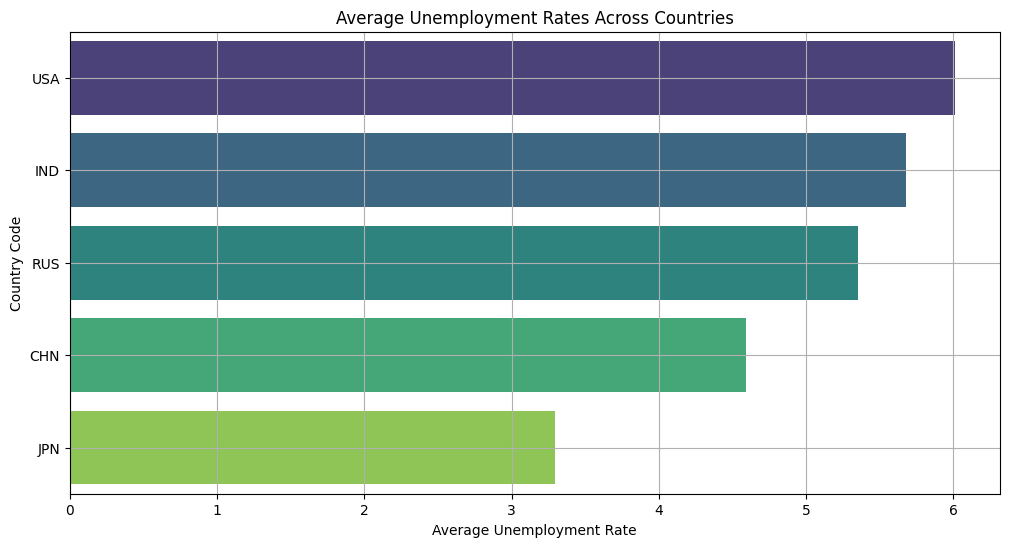

In [39]:
# Plotting bar plot for average unemployment rates across countries
average_unemployment = unemployment_df_2.groupby('Country Code')['Unemployment Rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_unemployment.values, y=average_unemployment.index, palette="viridis")
plt.title('Average Unemployment Rates Across Countries')
plt.xlabel('Average Unemployment Rate')
plt.ylabel('Country Code')
plt.grid(True)
plt.show()

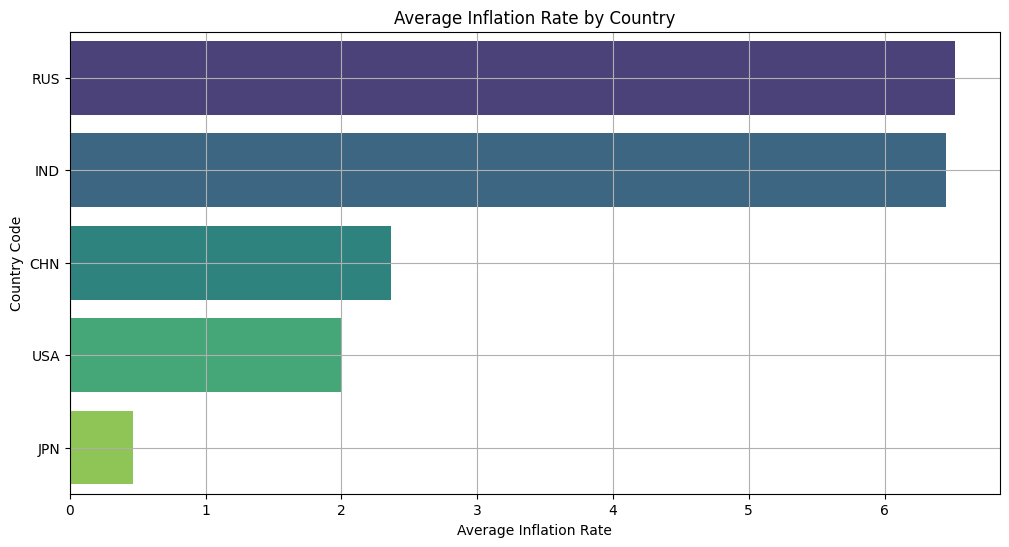

In [40]:
#Plotting bar plot for average Inflation rates across countries
average_Inflation = inflation_df_2.groupby('Country Code')['Inflation Rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_Inflation.values, y=average_Inflation.index, palette="viridis")
plt.title('Average Inflation Rate by Country')
plt.xlabel('Average Inflation Rate')
plt.ylabel('Country Code')
plt.grid(True)
plt.show()

From the visualization of Unemployment and Inflation rate trens from 1991 t0 2001 for the sepicific selected coutries show the different trends in each country.

*   **China:**
In China, the Unemployment rates in the 2020s are slightly higher compared to the '90s, the labor market remains relatively stable.Inflation rate in the 2020s are slightly higher compared to the '90s, the inflation rate remains relatively stable.
*   **India:**
India experienced a significant surge in unemployment in 2018 and 2019, followed by a slight decline in 2021, indicating a more volatile trend compared to the '90s. However the inflation rate in the 2020s, there was a significant surge in inflation in 2012, followed by a slight decline in 2015, and a subsequent modest increase in 2021. This indicates a more volatile trend compared to the stable '90s.


*   **Japan:**
In Japan The unemployment trend shifted drastically in the 2010s, with a sharp decline in 2013, maintaining lower rates compared to other countries in the following years. The Inflation rate  have a slight increase in 2013, followed by a return to the same stable pattern.
*   **Russia:**
 In the 2020s, there was a substantial drop in Unemployment compared to the '90s, indicating a significant improvement in the labor market. In the 2020s, there was a notable drop in Inflation rate  compared to the '90s, but it increased in 2015 when compared to other countries, indicating higher inflation rates.


* **USA:**
In 2011, there was a spike in unemployment, but a remarkable drop occurred in 2018 and 2019. However, there was a sudden increase in 2020 and 2021, reflecting a fluctuating pattern from low to higher unemployment rates. However the inflation rate have  a noticeable increase in 2021, indicating a more stable inflation rate overall.







# Summarization of the unemployment and inflation on both decades
The analysis of unemployment and inflation rate trends from 1991 to 2001 and the subsequent period in specific selected countries reveals distinctive patterns. In the early '90s, China maintained consistently low unemployment and inflation rates. However, in the 2020s, while experiencing a slight increase in both unemployment and inflation, the labor market and economy remained relatively stable. India faced moderately high unemployment in the '90s, stabilizing until the 2000s, contrasting with a more volatile trend in the 2020s marked by a surge in both unemployment in 2018-2019 and inflation in 2012. Japan initially had low unemployment, but a notable increase in the late '90s. In the 2020s, unemployment maintained a lower rate, while inflation showed a slight increase in 2013. Russia had higher unemployment and inflation in the '90s, followed by substantial improvements in both indicators in the 2020s, although inflation increased in 2015. The USA witnessed higher unemployment in the early '90s, followed by a decrease until 2000. In the 2020s, there was fluctuation in unemployment, notably dropping in 2018-2019 but increasing in 2020-2021. Inflation remained stable in the '90s and increased in 2021. Overall, these trends highlight the varied economic trajectories and the evolving nature of unemployment and inflation in these countries over the analyzed periods.

#Connection between Unemployment and Inflation:

In China, India, and Japan, there is a general trend of slightly higher inflation rates in the 2020s compared to the '90s, but the labor markets have varied responses.

Russia stands out with both unemployment and inflation experiencing significant improvements in the 2020s compared to the '90s.

The USA shows a complex relationship, with fluctuations in both unemployment and inflation, suggesting that the two are influenced by a combination of factors.

In general, the connection between unemployment and inflation is complex and influenced by various economic factors, policy decisions, and global events.

#Analyzing the Correlation between Unemployment and Inflation Rates
Commencing our exploration, we will focus on the evolving dynamics over time, we have strategically chosen years that mark the initiation (early '90s), midpoint ('00s), and culmination ('20s) of the respective decades. This selection allows us to observe long-term trends and potential shifts in the correlation between unemployment and inflation.Our primary objective is to delve into the correlation between unemployment and inflation rates across key countries, including the United States (USA), India (IND), China (CHN), Japan (JPN), and Russia (RUS).Employing statistical methods, we will rigorously analyze the correlation between unemployment and inflation rates for each of the selected years. This analysis aims to uncover patterns, if any, in the simultaneous movements of these two critical economic indicators.

In [93]:
#Transforming the top countries table to choose the interested years for analysis
years_of_interest = ['1991', '1996', '2001','Inflation_1991','Inflation_1996','Inflation_2001']
top_countries_table_3 = top_countries_table[['Country Code'] + years_of_interest]
top_countries_table_3.set_index('Country Code', inplace=True)

top_countries_table_3.head()

,1991,1996,2001,Inflation_1991,Inflation_1996,Inflation_2001
Country Code,,,,,,
CHN,2.37,3.12,3.80,3.58,8.31,0.72
IND,5.60,5.74,5.58,13.87,8.98,3.78
JPN,2.10,3.40,5.02,3.25,0.14,-0.74
RUS,5.41,9.67,8.98,92.70,47.75,21.48
USA,6.80,5.45,4.73,4.23,2.93,2.83


In [94]:
years_of_interest = ['2011', '2015', '2021','Inflation_2011','Inflation_2015','Inflation_2021']
top_countries_table_4 = top_countries_table_2[['Country Code'] + years_of_interest]
top_countries_table_4.set_index('Country Code', inplace=True)
top_countries_table_4.head()

,2011,2015,2021,Inflation_2011,Inflation_2015,Inflation_2021
Country Code,,,,,,
CHN,4.55,4.63,4.82,5.55,1.44,0.90
IND,5.43,5.43,5.98,8.86,5.87,4.89
JPN,4.55,3.40,2.80,-0.27,0.79,-0.23
RUS,6.54,5.57,5.01,8.44,15.53,6.69
USA,8.95,5.28,5.46,3.16,0.12,4.70


In [85]:
merged_top_countries = top_countries_table_3.merge(top_countries_table_4, left_index=True, right_index=True, suffixes=('_2011', '_2015'))
merged_top_countries.head()
merged_top_countries.columns

Index(['1991', '1996', '2001', 'Inflation_1991', 'Inflation_1996',
       'Inflation_2001', '2011', '2015', '2021', 'Inflation_2011',
       'Inflation_2015', 'Inflation_2021'],
      dtype='object')

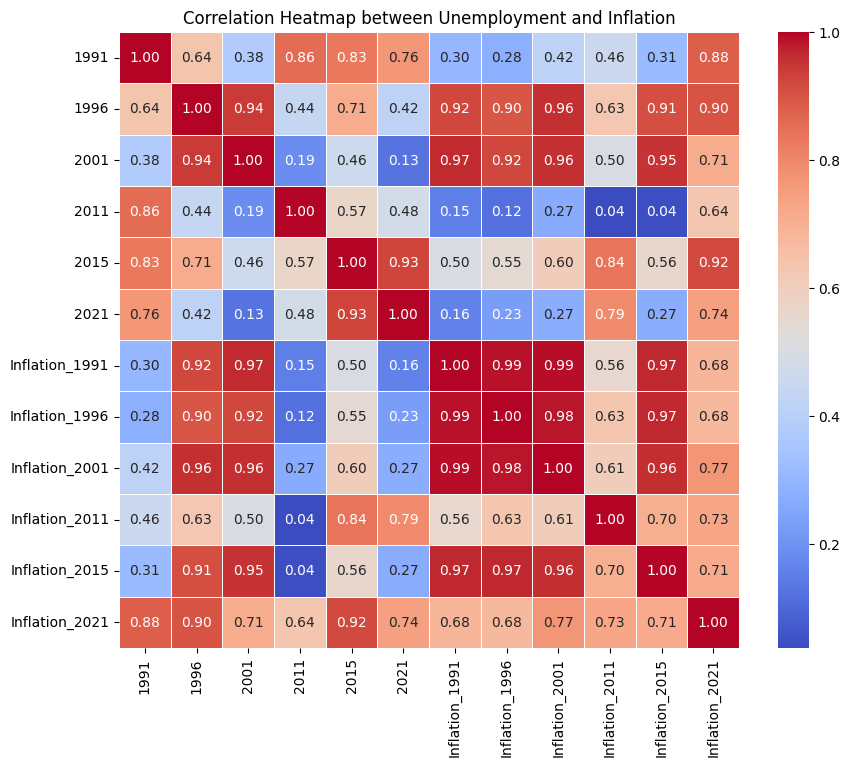

Columns do not exist for year pair: 2021 and Inflation_2021


In [110]:
#Heata map for understanding the correlation between the unemployment and inflation
unemployment_columns = ['1991', '1996', '2001', '2011', '2015', '2021']
inflation_columns = ['Inflation_1991', 'Inflation_1996', 'Inflation_2001', 'Inflation_2011', 'Inflation_2015', 'Inflation_2021']
correlation_matrix = merged_top_countries[unemployment_columns + inflation_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Unemployment and Inflation')
plt.show()

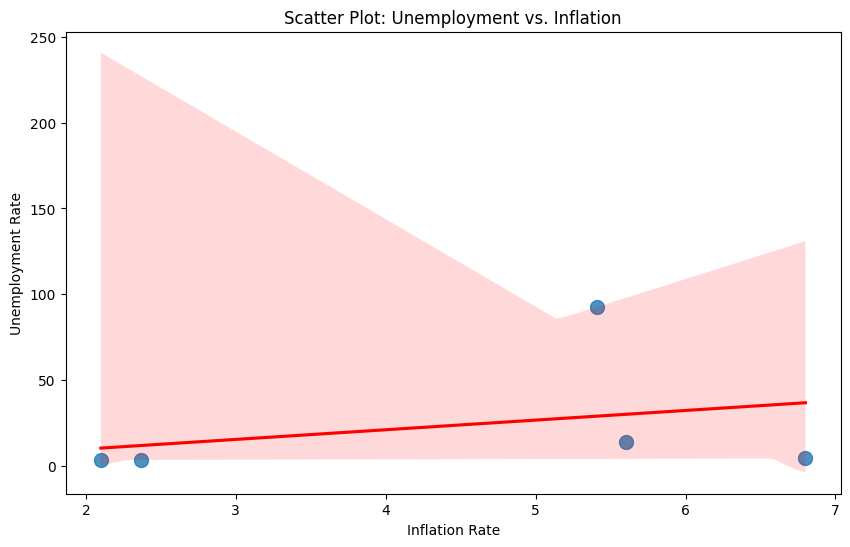

In [92]:
# To handle any non-numeric values by converting them to NaN (Not a Number)
for col in unemployment_columns + inflation_columns:
    merged_top_countries[col] = pd.to_numeric(merged_top_countries[col], errors='coerce')

# Plotting scatter plot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x=unemployment_columns[0], y=inflation_columns[0], data=merged_top_countries, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Scatter Plot: Unemployment vs. Inflation')
plt.xlabel('Inflation Rate')
plt.ylabel('Unemployment Rate')
plt.show()


# Findings
For the year 1991, the correlation coefficient between unemployment and inflation (1991) is 0.30, indicating a modest positive correlation.

In 1996, the correlation strengthens significantly, with a coefficient of 0.89, suggesting a strong positive correlation between unemployment and inflation (1996).

The year 2001 exhibits an even higher correlation, with a coefficient of 0.95, indicating a very strong positive relationship between unemployment and inflation (2001).

In 2011, the correlation weakens substantially, with a coefficient of 0.03, suggesting a minimal positive correlation between unemployment and inflation (2011).

By 2015, the correlation picks up again, with a coefficient of 0.56, signifying a moderate positive correlation between unemployment and inflation (2015).

In 2021, the correlation remains strong but slightly lower than in 2001, with a coefficient of 0.74, indicating a robust positive correlation between unemployment and inflation (Inflation).

Moreover, when comparing the correlation coefficients across the years 1991, 1996, 2001, 2011, 2015, and 2021 with their respective inflation rates (Inflation_1991, Inflation_1996, Inflation_2001, Inflation_2011, Inflation_2015, Inflation_2021), an overall correlation coefficient of 0.63 is observed. This consolidated coefficient reflects a moderate positive correlation between unemployment and inflation across these years.

#Correlation between Unemployment and Inflation Rates
The analysis of correlation coefficients reveals dynamic patterns in the relationship between unemployment and inflation over the specified years. Notably, the strong positive correlations in the mid-'90s and early 2000s suggest a synchronized movement between unemployment and inflation during periods of economic change. However, the weakening correlation in 2011 indicates a departure from this trend, with only a minimal positive association.

The resurgence of a moderate positive correlation in 2015 and 2021 suggests a renewed but less intense connection between unemployment and inflation. The overall correlation coefficient of 0.6380 indicates a moderate positive correlation across the selected years, emphasizing the nuanced nature of the relationship.

These findings underscore the importance of considering specific time periods when analyzing the interplay between unemployment and inflation. The observed variations in correlation coefficients highlight the influence of economic factors, policy changes, and external forces on the intricate dynamics between these two critical economic indicators. Policymakers and stakeholders should take into account these fluctuations to formulate effective strategies for economic stability and growth.

#Conclusion
In conclusion, the analysis spanning from 1991 to 2021 unravels the intricate dynamics between global unemployment and inflation, challenging traditional Phillips curve assumptions in the face of 21st-century economic shifts. Examining extreme unemployment rates across three decades highlights the dynamic nature of these trends, with Lesotho, North Macedonia, and Djibouti experiencing the highest average unemployment rates, emphasizing the need for tailored policy responses. The focused examination of key countries reveals diverse patterns in unemployment and inflation influenced by economic growth, monetary policy, oil prices, and wage patterns, underscoring the importance of considering specific time periods and unique economic trajectories. The connection between unemployment and inflation varies, with China, India, and Japan showing slightly higher inflation rates in the 2020s, while Russia exhibits notable improvements. The USA demonstrates a complex relationship, influenced by multiple factors. Correlation analysis exposes dynamic patterns, with strong positive correlations in the mid-'90s and early 2000s, weakening in 2011, and resurging in 2015 and 2021, highlighting the nuanced nature of this relationship influenced by economic factors, policy changes, and external forces.

Policymakers and stakeholders should consider these findings when formulating strategies for economic stability and growth. Recognizing the evolving nature of the correlation between unemployment and inflation is essential for effective decision-making in the face of real-world trends and challenges. This comprehensive overview contributes to a deeper understanding of the economic landscape, aiding policymakers and business stakeholders in navigating the complexities of managing unemployment and inflation.